###CRISP - DM Method
- Barry - Business Understanding
- Drove - Data Understanding
- Directly to the - Data Prep
- Medical - Modelling
- Emergency - Evaluation
- Department - Deployment

# 1. Business Understanding
- Predict transactions
- Likely regression
- Data for 3 year
- Advised data quality is okay

# 2. Data Understanding


In [4]:
import pandas as pd

In [7]:
df = pd.read_csv('regression.csv')

In [8]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [9]:
df.tail()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
4207,2021,Dec,CC302,2000005,Purchases,Expense,698.121
4208,2021,Dec,CC302,3000000,Cash at Bank,Asset,-282.056
4209,2021,Dec,CC302,3000001,Inventory,Asset,537.478
4210,2021,Dec,CC302,3000002,Accounts Receivable,Asset,1152.680
4211,2021,Dec,CC302,4000001,Accounts Payable,Liability,-1020.000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 4212 non-null   int64  
 1   Month                4212 non-null   object 
 2   Cost Centre          4212 non-null   object 
 3   Account              4212 non-null   int64  
 4   Account Description  4212 non-null   object 
 5   Account Type         4212 non-null   object 
 6   Amount               4212 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 230.5+ KB


In [15]:
for cols in df.columns:
    print(cols,len(df[cols].unique()),df[cols].unique())

Year 3 [2019 2020 2021]
Month 12 ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Cost Centre 9 ['CC100' 'CC101' 'CC102' 'CC200' 'CC201' 'CC202' 'CC300' 'CC301' 'CC302']
Account 13 [1000000 1000001 1000002 1000004 2000000 2000001 2000002 2000003 2000005
 3000000 3000001 3000002 4000001]
Account Description 13 ['Product Sales' 'Licensing Revenue' 'Service Revenue' 'Fee Revenue'
 'Cost of Good Sold' 'Staff Expenses' 'Technology Expenses'
 'Property Expenses' 'Purchases' 'Cash at Bank' 'Inventory'
 'Accounts Receivable' 'Accounts Payable']
Account Type 4 ['Revenue' 'Expense' 'Asset' 'Liability']
Amount 3956 [1344.051  480.968  650.82  ... -282.056  537.478 1152.68 ]


In [16]:
df.describe()

,Year,Account,Amount
count,4212.000000,4.212000e+03,4212.000000
mean,2020.000000,2.076925e+06,476.470421
std,0.816594,9.167528e+05,477.296234
min,2019.000000,1.000000e+06,-1020.000000
25%,2019.000000,1.000004e+06,268.044500
50%,2020.000000,2.000002e+06,512.998500
75%,2021.000000,3.000000e+06,755.960250
max,2021.000000,4.000001e+06,2378.880000


In [17]:
df.dtypes

Year                     int64
Month                   object
Cost Centre             object
Account                  int64
Account Description     object
Account Type            object
Amount                 float64
dtype: object

## Visualize Data

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns

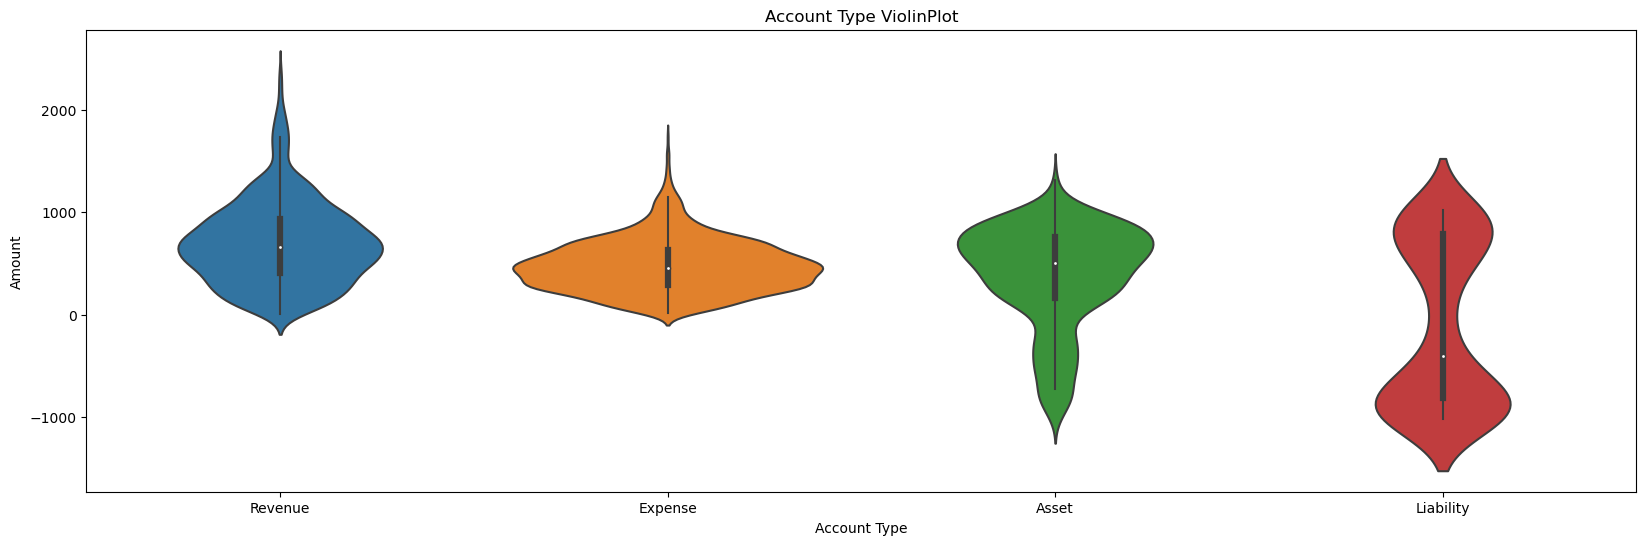

In [20]:
plt.figure(figsize=(20,6))
sns.violinplot(x = 'Account Type',y = "Amount", data= df).set_title('Account Type ViolinPlot')
plt.show()

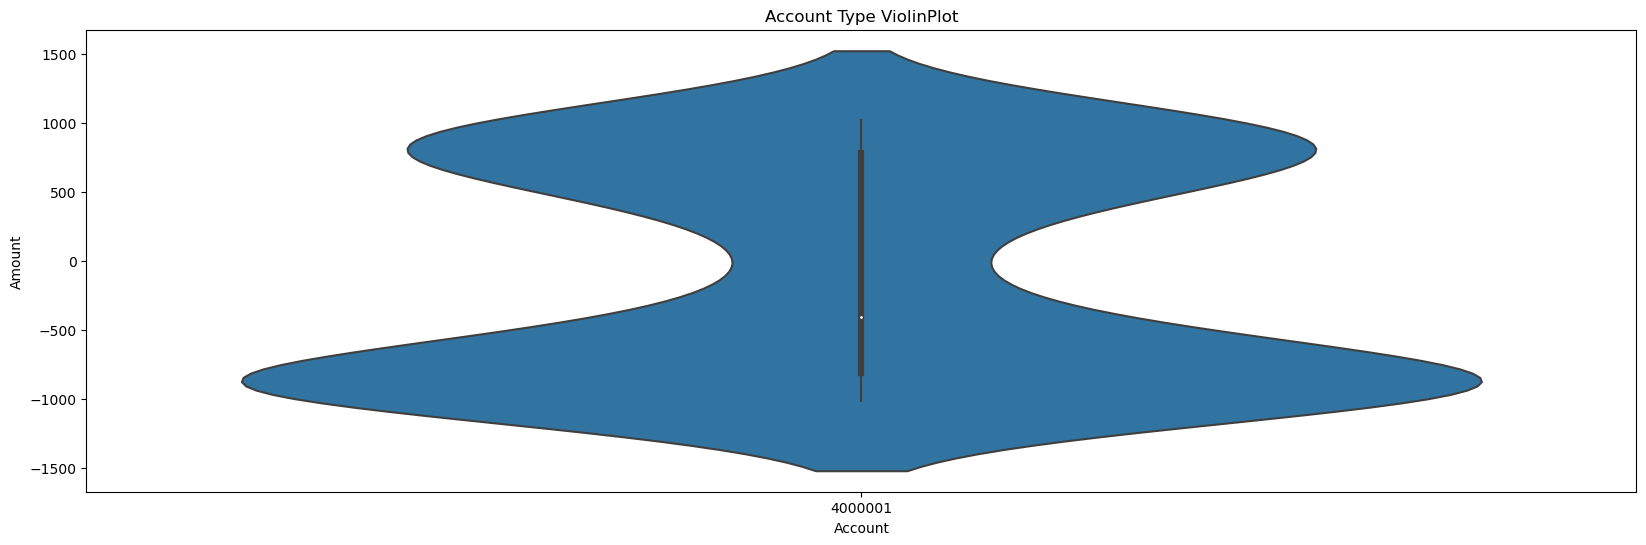

In [22]:
plt.figure(figsize=(20,6))
sns.violinplot(x = 'Account',y = "Amount", data= df[df['Account Type']=='Liability']).set_title('Account Type ViolinPlot')
plt.show()

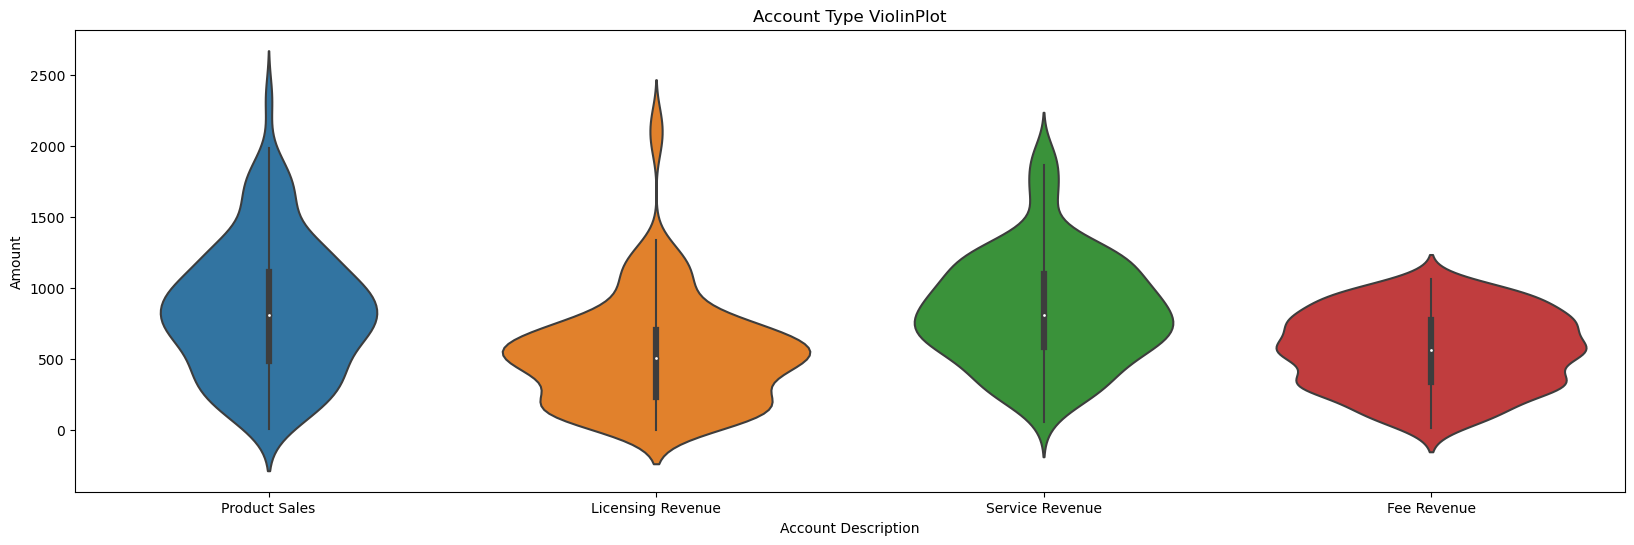

In [23]:
plt.figure(figsize=(20,6))
sns.violinplot(x = 'Account Description',y = "Amount", data= df[df['Account Type']=='Revenue']).set_title('Account Type ViolinPlot')
plt.show()

# Review Trends

In [24]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [25]:
monthmap = {
    'Jan':1,
    'Feb':2,
    'Mar':3,
    'Apr':4,
    'May':5,
    'Jun':6,
    'Jul':7,
    'Aug':8,
    'Sep':9,
    'Oct':10,
    'Nov':11,
    'Dec':12,
}

In [27]:
monthmap['Jan']

1

In [28]:
df['Period'] = df['Month'].apply(lambda x: monthmap[x])

In [30]:
df['Day'] = 1

In [32]:
df['Date'] = df['Year'].astype(str) + '-' + df['Period'].astype(str)+ '-' + df['Day'].astype(str)

In [34]:
df['Date'] = pd.to_datetime(df['Date'])

In [37]:
df.dtypes

Year                            int64
Month                          object
Cost Centre                    object
Account                         int64
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

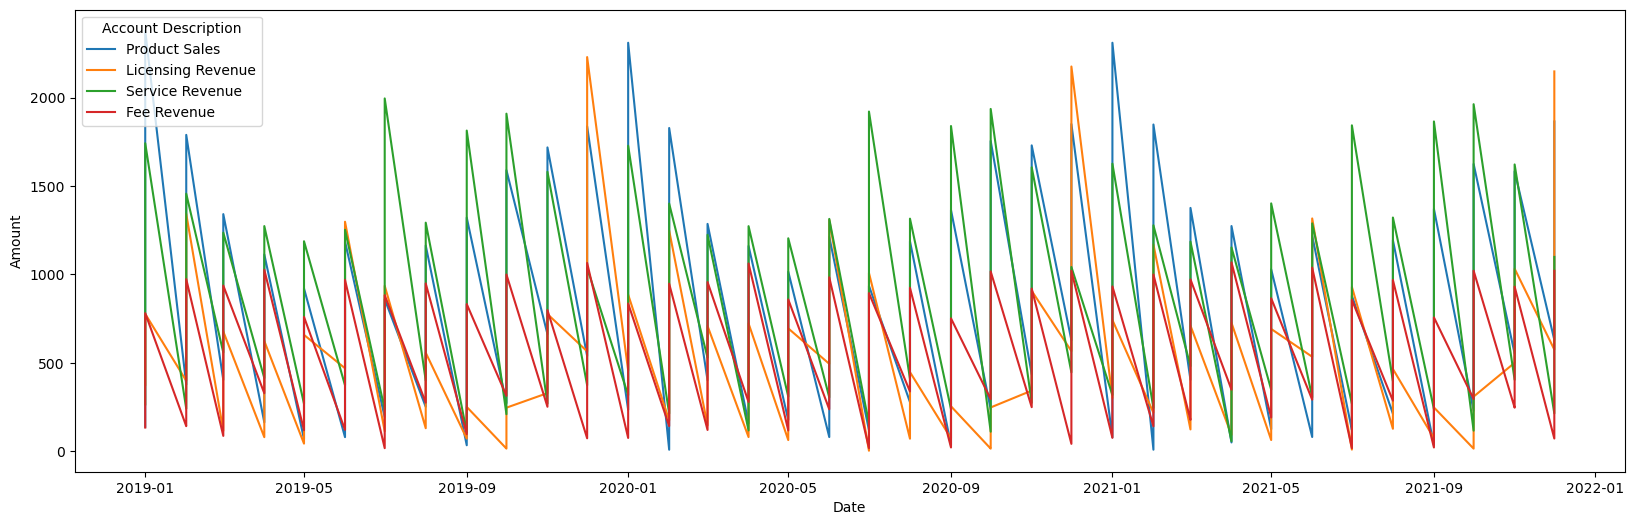

In [44]:
plt.figure(figsize= (20,6))
sns.lineplot(x = 'Date', y = 'Amount',hue = 'Account Description' ,estimator = None,data = df[df['Account Type']=='Revenue'])
plt.show()

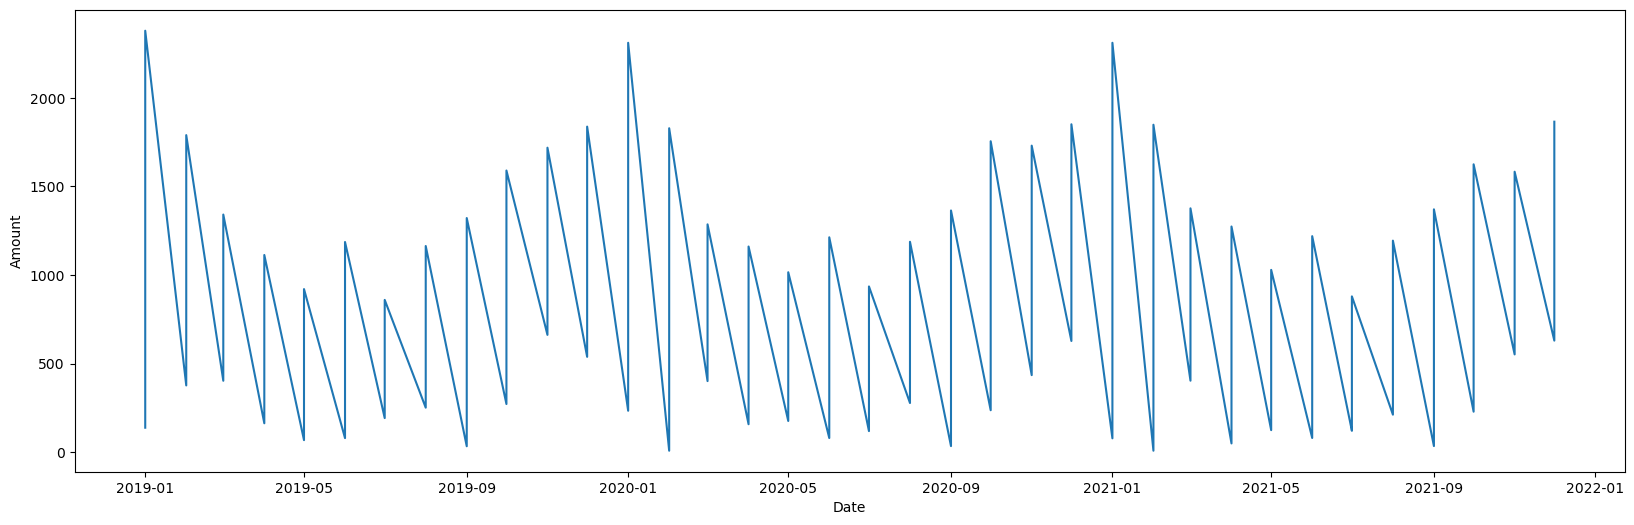

In [47]:
plt.figure(figsize= (20,6))
sns.lineplot(x = 'Date', y = 'Amount',estimator = None,data = df[df['Account Description']=='Product Sales'])
plt.show()

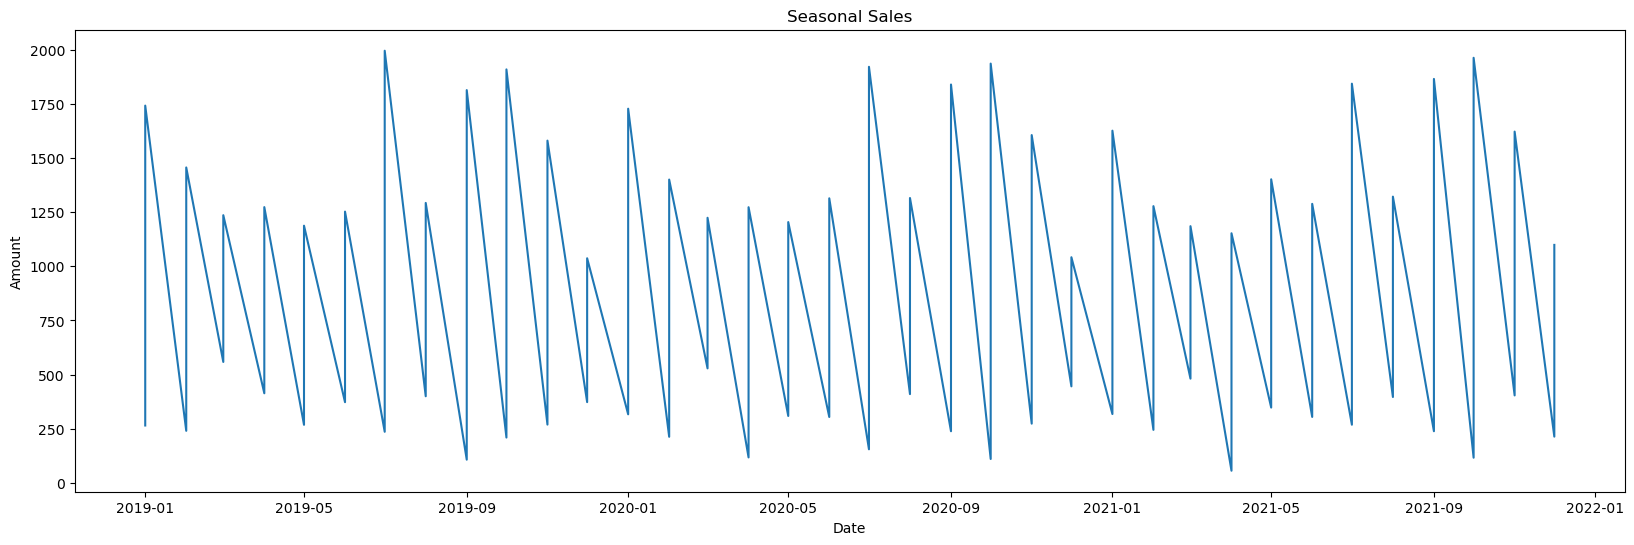

In [49]:
plt.figure(figsize= (20,6))
sns.lineplot(x = 'Date', y = 'Amount',estimator = None,data = df[df['Account Description']=='Service Revenue']).set_title('Seasonal Sales')
plt.show()

# Corelation

In [52]:
df['Account Description'].unique()

array(['Product Sales', 'Licensing Revenue', 'Service Revenue',
       'Fee Revenue', 'Cost of Good Sold', 'Staff Expenses',
       'Technology Expenses', 'Property Expenses', 'Purchases',
       'Cash at Bank', 'Inventory', 'Accounts Receivable',
       'Accounts Payable'], dtype=object)

In [53]:
pd.get_dummies(df['Account'])

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
0,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,False,False,False,False,False,False,False,False,True,False,False,False,False
4208,False,False,False,False,False,False,False,False,False,True,False,False,False
4209,False,False,False,False,False,False,False,False,False,False,True,False,False
4210,False,False,False,False,False,False,False,False,False,False,False,True,False


In [63]:
corrdict = {}
for key, row in df.join(pd.get_dummies(df['Account'])).iterrows():
    corrdict[key] = {int(row['Account']):row['Amount']}

In [67]:
corrdf = pd.DataFrame.from_dict(corrdict).T.fillna(0)

In [68]:
corrdf

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
0,1344.051,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
1,0.000,480.968,0.00,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
2,0.000,0.000,650.82,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
3,0.000,0.000,0.00,339.36,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
4,0.000,0.000,0.00,0.00,1125.328,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,698.121,0.000,0.000,0.00,0.0
4208,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.000,-282.056,0.000,0.00,0.0
4209,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.000,0.000,537.478,0.00,0.0
4210,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000,1152.68,0.0


In [69]:
corrdf.corr()

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
1000000,1.000000,-0.058293,-0.065252,-0.064706,-0.061763,-0.066141,-0.065989,-0.065547,-0.061377,0.007528,-0.070332,-0.060539,0.010549
1000001,-0.058293,1.000000,-0.060742,-0.060233,-0.057494,-0.061569,-0.061428,-0.061016,-0.057135,0.007007,-0.065471,-0.056355,0.009820
1000002,-0.065252,-0.060742,1.000000,-0.067424,-0.064358,-0.068920,-0.068762,-0.068301,-0.063956,0.007844,-0.073287,-0.063083,0.010992
1000004,-0.064706,-0.060233,-0.067424,1.000000,-0.063819,-0.068343,-0.068186,-0.067728,-0.063420,0.007778,-0.072673,-0.062555,0.010900
2000000,-0.061763,-0.057494,-0.064358,-0.063819,1.000000,-0.065235,-0.065085,-0.064648,-0.060536,0.007424,-0.069369,-0.059710,0.010404
2000001,-0.066141,-0.061569,-0.068920,-0.068343,-0.065235,1.000000,-0.069699,-0.069231,-0.064827,0.007951,-0.074286,-0.063942,0.011142
2000002,-0.065989,-0.061428,-0.068762,-0.068186,-0.065085,-0.069699,1.000000,-0.069072,-0.064679,0.007933,-0.074115,-0.063796,0.011116
2000003,-0.065547,-0.061016,-0.068301,-0.067728,-0.064648,-0.069231,-0.069072,1.000000,-0.064244,0.007879,-0.073618,-0.063368,0.011041
2000005,-0.061377,-0.057135,-0.063956,-0.063420,-0.060536,-0.064827,-0.064679,-0.064244,1.000000,0.007378,-0.068935,-0.059337,0.010339
3000000,0.007528,0.007007,0.007844,0.007778,0.007424,0.007951,0.007933,0.007879,0.007378,1.000000,0.008455,0.007277,-0.001268


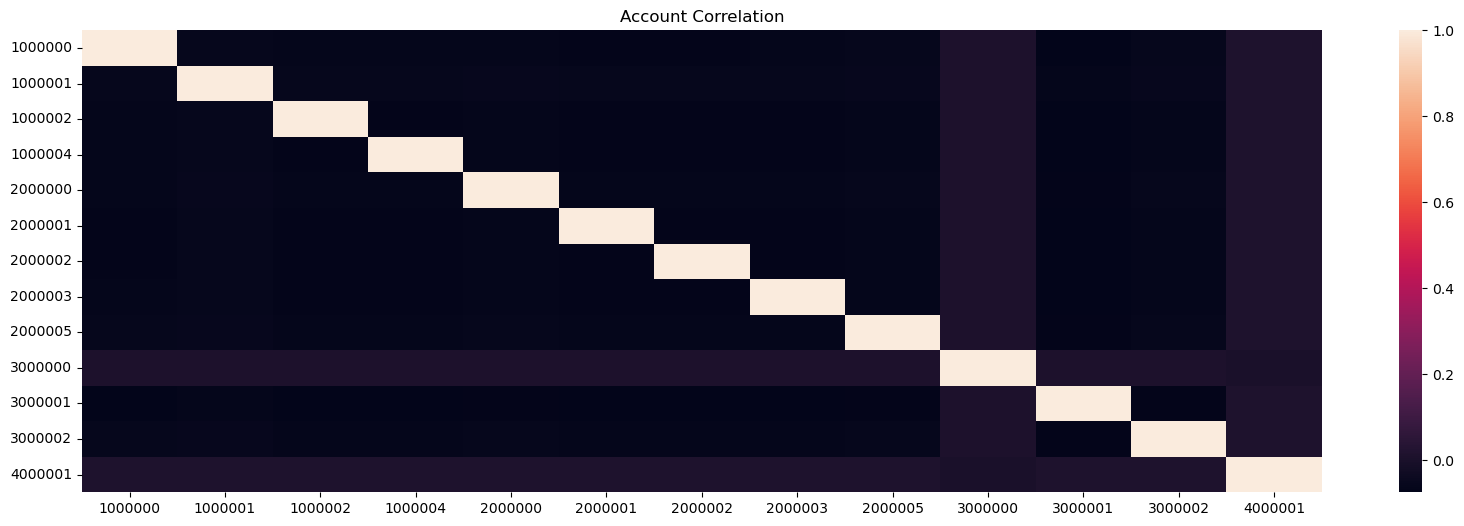

In [71]:
plt.figure(figsize=(20,6))
sns.heatmap(corrdf.corr()).set_title('Account Correlation')
plt.show()

In [73]:
df[df['Account']==3000000]

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
9,2019,Jan,CC100,3000000,Cash at Bank,Asset,476.713,1,1,2019-01-01
22,2019,Jan,CC101,3000000,Cash at Bank,Asset,464.197,1,1,2019-01-01
35,2019,Jan,CC102,3000000,Cash at Bank,Asset,-296.261,1,1,2019-01-01
48,2019,Jan,CC200,3000000,Cash at Bank,Asset,750.000,1,1,2019-01-01
61,2019,Jan,CC201,3000000,Cash at Bank,Asset,187.647,1,1,2019-01-01
...,...,...,...,...,...,...,...,...,...,...
4156,2021,Dec,CC201,3000000,Cash at Bank,Asset,413.616,12,1,2021-12-01
4169,2021,Dec,CC202,3000000,Cash at Bank,Asset,375.657,12,1,2021-12-01
4182,2021,Dec,CC300,3000000,Cash at Bank,Asset,-492.546,12,1,2021-12-01
4195,2021,Dec,CC301,3000000,Cash at Bank,Asset,-579.986,12,1,2021-12-01


In [75]:
df[df['Account']==4000001]

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
12,2019,Jan,CC100,4000001,Accounts Payable,Liability,980.0,1,1,2019-01-01
25,2019,Jan,CC101,4000001,Accounts Payable,Liability,200.0,1,1,2019-01-01
38,2019,Jan,CC102,4000001,Accounts Payable,Liability,-980.0,1,1,2019-01-01
51,2019,Jan,CC200,4000001,Accounts Payable,Liability,980.0,1,1,2019-01-01
64,2019,Jan,CC201,4000001,Accounts Payable,Liability,784.0,1,1,2019-01-01
...,...,...,...,...,...,...,...,...,...,...
4159,2021,Dec,CC201,4000001,Accounts Payable,Liability,804.0,12,1,2021-12-01
4172,2021,Dec,CC202,4000001,Accounts Payable,Liability,-1018.0,12,1,2021-12-01
4185,2021,Dec,CC300,4000001,Accounts Payable,Liability,-1020.0,12,1,2021-12-01
4198,2021,Dec,CC301,4000001,Accounts Payable,Liability,-612.0,12,1,2021-12-01


# 3. Data Preparation

4. Modelling

5. Evaluation

6. Deployment